In [348]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pycaret as pc
from tqdm.notebook import tqdm

In [349]:
## Some cool settings
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#93D30C", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
tqdm.pandas()

In [237]:
# Read the data
heartbeat_df = pd.read_csv("/Users/adirserruya/Desktop/PyCarret tutorial/BinaryHeartbeat_TRAIN.ts", header=None)
#Splitting the data into train and test
splits_data  = [x.split(":")[0] for x in heartbeat_df[18529]]
splits_target = [x.split(":")[1] for x in heartbeat_df[18529]]
#Splitting the training data and the labels
heartbeat_df[18529],heartbeat_df["18530"] = splits_data,splits_target
#Setting proper labels to the data
heartbeat_df.columns = ["feat_"+str(x) for x in range(heartbeat_df.shape[1])]
#Formatting the data as float32
heartbeat_df = heartbeat_df.astype("float32")


In [350]:
#read the metadata of the file using pandas
import os,sys,csv
csv.field_size_limit(sys.maxsize)

problems_metadata = {}

folder_names = os.listdir("/Users/adirserruya/Desktop/PyCarret tutorial/Multivariate_datasets")
#Only for mac problem with hidden files
folder_names = [x for x in folder_names if x[0] != "."]
print(len(folder_names))
count = 0
for folder in folder_names:
    print(folder)
    metadata = pd.read_csv("/Users/adirserruya/Desktop/PyCarret tutorial/Multivariate_datasets/"+folder+"/"+folder+"_TRAIN.ts",
                       engine ="python",header=None, nrows=200 ,dtype=str,delimiter="#")
    metadata[0] = metadata[0].astype(str)
    meta_dict = {}
    for row in metadata[0][:-1]:
        if row[0] == "@":
            splity = row.split(" ")
            meta_dict[splity[0].lstrip("@")] = splity[1:]
    count+=1
    print(count)
    print(meta_dict)
    try:
        PROBLEM_NAME = meta_dict["problemName"][0]
        TIME_STAMPS = bool(meta_dict["timeStamps"][0])
        MISSING_VALUES = bool(meta_dict["missing"][0])
        UNIVARIATE = bool(meta_dict["univariate"][0])
        NUM_FEATURES = int(meta_dict["dimensions"][0])
        EQUAL_LENGTH_INPUTS = bool(meta_dict["equalLength"][0])
        SERIES_LENGTH = int(meta_dict["seriesLength"][0])
        POSSIBLE_LABELS = meta_dict["classLabel"][1:]
    except:
        print("Error in the metadata")

30
LSST
1
{'problemName': ['LSST'], 'timeStamps': ['false'], 'missing': ['false'], 'univariate': ['false'], 'dimensions': ['6'], 'equalLength': ['true'], 'seriesLength': ['36'], 'classLabel': ['true', '6', '15', '16', '42', '52', '53', '62', '64', '65', '67', '88', '90', '92', '95'], 'data': []}
SelfRegulationSCP2
2
{'problemName': ['SelfRegulationSCP2'], 'timeStamps': ['false'], 'missing': ['false'], 'univariate': ['false'], 'dimensions': ['7'], 'equalLength': ['true'], 'seriesLength': ['1152'], 'classLabel': ['true', 'negativity', 'positivity'], 'data': []}
FaceDetection
3
{'problemName': ['FaceDetection'], 'timeStamps': ['false'], 'missing': ['false'], 'univariate': ['false'], 'dimensions': ['144'], 'equalLength': ['true'], 'seriesLength': ['62'], 'classLabel': ['true', '0', '1'], 'data': []}
MotorImagery
4
{'problemName': ['MotorImagery'], 'timeStamps': ['false'], 'missing': ['false'], 'univariate': ['false'], 'dimensions': ['64'], 'equalLength': ['true'], 'seriesLength': ['3000'],

In [334]:
#read the metadata of the file using pandas
import os
folder_names = os.listdir("/Users/adirserruya/Desktop/PyCarret tutorial/Multivariate_datasets")
for folder in folder_names:
    metadata = pd.read_csv("/Users/adirserruya/Desktop/PyCarret tutorial/Multivariate_datasets/"+folder+"/"+folder+"_TRAIN.ts",
                       engine ="python",header=None, nrows=30 ,dtype=str,delimiter="#")
    metadata[0] = metadata[0].astype(str)
    meta_dict = {}
    for row in metadata[0][:-1]:
        if row[0] == "@":
            splity = row.split(" ")
            meta_dict[splity[0].lstrip("@")] = splity[1:]
    print(meta_dict)
        
print(meta_dict)
    
metadata = pd.read_csv("/Users/adirserruya/Desktop/PyCarret tutorial/Multivariate_datasets/BasicMotions/BasicMotions_TRAIN.ts",
                       engine ="python",header=None, nrows=30 ,dtype=str,delimiter="#")
metadata[0] = metadata[0].astype(str)
meta_dict = {}
for row in metadata[0][:-1]:
    if row[0] == "@":
        splity = row.split(" ")
        meta_dict[splity[0].lstrip("@")] = splity[1:]
        
print(meta_dict)

PROBLEM_NAME = meta_dict["problemName"][0]
TIME_STAMPS = bool(meta_dict["timeStamps"][0])
MISSING_VALUES = bool(meta_dict["missing"][0])
UNIVARIATE = bool(meta_dict["univariate"][0])
NUM_FEATURES = int(meta_dict["dimensions"][0])
EQUAL_LENGTH_INPUTS = bool(meta_dict["equalLength"][0])
SERIES_LENGTH = int(meta_dict["seriesLength"][0])
POSSIBLE_LABELS = meta_dict["classLabel"][1:]



['LSST', 'SelfRegulationSCP2', 'FaceDetection', 'MotorImagery', 'PenDigits', '.DS_Store', 'Libras', 'PhonemeSpectra', 'InsectWingbeat', 'Cricket', 'Handwriting', 'ArticularyWordRecognition', 'StandWalkJump', 'CharacterTrajectories', 'ERing', 'HandMovementDirection', 'SelfRegulationSCP1', 'JapaneseVowels', 'Heartbeat', 'RacketSports', 'EigenWorms', 'FingerMovements', 'PEMS-SF', 'Epilepsy', 'NATOPS', 'AtrialFibrillation', 'SpokenArabicDigits', 'EthanolConcentration', 'BasicMotions', 'DuckDuckGeese', 'UWaveGestureLibrary']
{'problemName': ['BasicMotions'], 'timeStamps': ['false'], 'missing': ['false'], 'univariate': ['false'], 'dimensions': ['6'], 'equalLength': ['true'], 'seriesLength': ['100'], 'classLabel': ['true', 'Standing', 'Running', 'Walking', 'Badminton'], 'data': []}


In [330]:
POSSIBLE_LABELS

['Standing', 'Running', 'Walking', 'Badminton']

True


In [290]:
metadata[0]

0                                                   NaN
1                                                   NaN
2                                                   NaN
3                                                   NaN
4                             @problemName BasicMotions
5                                     @timeStamps false
6                                        @missing false
7                                     @univariate false
8                                         @dimensions 6
9                                     @equalLength true
10                                    @seriesLength 100
11    @classLabel true Standing Running Walking Badm...
12                                                @data
Name: 0, dtype: object

In [286]:
metadata

nan

In [284]:
print(metadata[6].split(" ")[1])

false


In [269]:
x = []
for data in metadata[0]:
    print(data.split(" "))

AttributeError: 'float' object has no attribute 'split'

In [258]:
metadata

,0
0,#The data was generated as part of a student p...


In [255]:
meta_data = pd.read_csv("/Users/adirserruya/Desktop/PyCarret tutorial/Multivariate_datasets/BasicMotions/BasicMotions_TRAIN.ts"")

SyntaxError: unterminated string literal (detected at line 1) (354606841.py, line 1)

In [247]:
basic_motion_df = pd.read_csv("/Users/adirserruya/Desktop/PyCarret tutorial/Multivariate_datasets/BasicMotions/BasicMotions_TRAIN.ts", header=13)


In [254]:
labels = []
count = 0
count_2 = 0
for sample in basic_motion_df.iloc[0]:
    count += 1
    if type(sample) == str:
        count_2 += 1
        labels.append(sample.split(":"))
        print(f"Series number {count_2} was found after {count}")


Series number 1 was found after 100
Series number 2 was found after 199
Series number 3 was found after 298
Series number 4 was found after 397
Series number 5 was found after 496
Series number 6 was found after 595


In [253]:
labels

[['-0.333625', '-0.61085'],
 ['-0.215987', '-0.147376'],
 ['-8.48E-4', '-0.103872'],
 ['-0.00799', '-0.109198'],
 ['0.01598', '-0.037287'],
 ['0.034624', 'Standing']]

<AxesSubplot: >

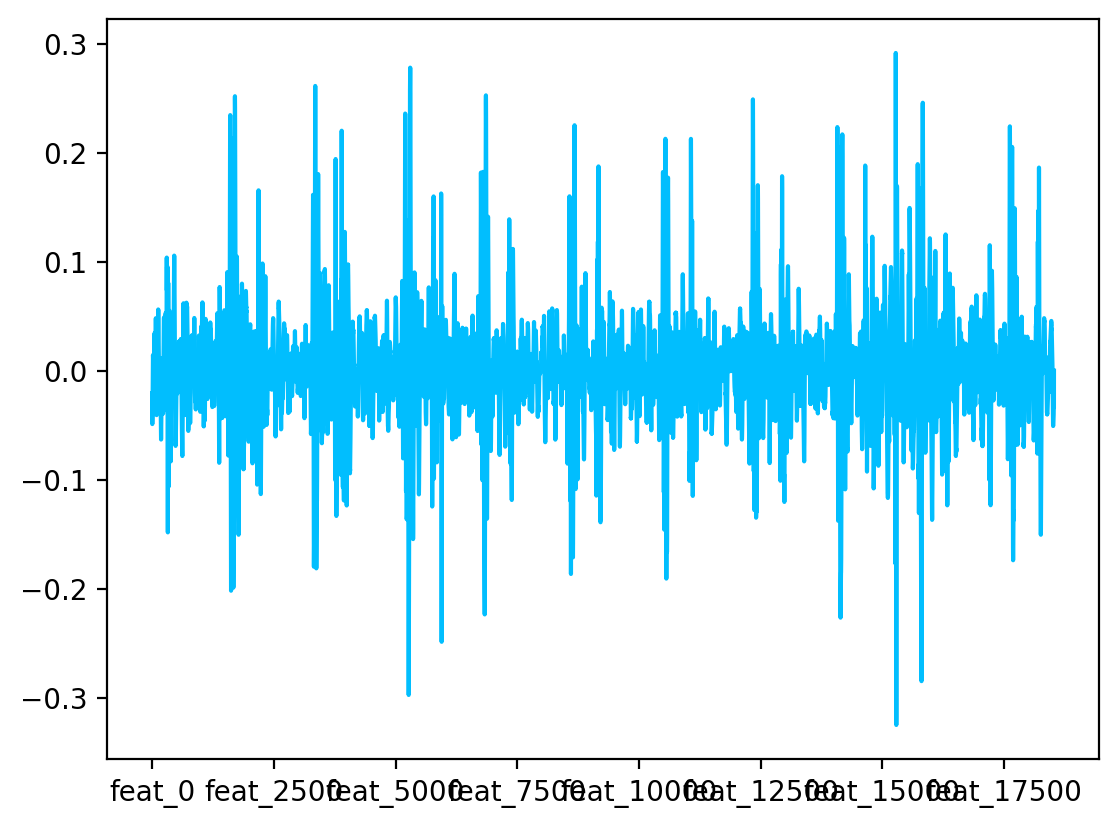

In [242]:

heartbeat_df.iloc[0].plot()

In [189]:
import tslearn
from tslearn.utils import to_time_series_dataset,to_sklearn_dataset
x = to_sklearn_dataset(heartbeat_df)


In [32]:
heartbeat_df.astype('float32').plot(figsize=(20, 10), subplots=True, layout=(3, 1), sharex=False, sharey=False)


ValueError: could not convert string to float: '#EEG dataset based on classifying between short and long blinks. Each of the subjects was asked to blink for a duration of 2 seconds, as either a short or long blink. '